In [1]:
from Game import *

Version:  0.2.30


## Game functions

In [2]:
def initial_state(N=21):
    return N

def show_state(state):
    print("There are ",state,"sticks")
    
def valid_moves(state,player):
    if state==2:
        return [1,2]
    elif state==1:
        return [1]
    else:
        return [1,2,3]
    
def update_state(state,player,move):
    new_state=state-move
    return new_state

def win_status(state,player):
    # the state is *after* the move for the player
    if state==1:
        return "win"
    
    if state==0:
        return "lose"
    
    return None # mid-game

## Agent Functions

In [3]:
def human_move(state,player):
    move=int(input("how many sticks to take (1,2, or 3?"))
    return move
human_agent=Agent(human_move)    

In [4]:
def random_move(state,player):
    
    move=random.choice(valid_moves(state,player))
    return move


random_agent=Agent(random_move)

In [5]:
from Game.minimax import *
def minimax_move(state,player):

    values,moves=minimax_values(state,player,display=True)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

## Skittles Agent

In [6]:
def skittles_move(state,player,info):
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=2  # initial number of skittles
    
    move=weighted_choice(T[state])
    
    if move is None:  
        
        # learn
        if learning:
            if last_state:
                T[last_state][last_action]-=1 # take away a skittle
                if T[last_state][last_action]<0:
                    T[last_state][last_action]=0
    
        return random_move(state,player)
    else:
        return move

In [7]:
def skittles_after(status,player,info):
    # not return anything but...
    # will adjust the skittles table if lost the game
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    if learning:
        if status=='lose':  # only learn when you lose
            T[last_state][last_action]-=1 # take away a skittle
            if T[last_state][last_action]<0:
                T[last_state][last_action]=0

In [8]:
skittles_agent=Agent(skittles_move)
skittles_agent.post=skittles_after
skittles_agent.T=Table()  # makes an empty table
skittles_agent.learning=True

## Running the Game

In [9]:
g=Game()
g.run(random_agent,skittles_agent)

====
Game  1
There are  21 sticks
Player 1 moves 2
There are  19 sticks
Player 2 moves 2
There are  17 sticks
Player 1 moves 2
There are  15 sticks
Player 2 moves 1
There are  14 sticks
Player 1 moves 3
There are  11 sticks
Player 2 moves 2
There are  9 sticks
Player 1 moves 1
There are  8 sticks
Player 2 moves 2
There are  6 sticks
Player 1 moves 2
There are  4 sticks
Player 2 moves 2
There are  2 sticks
Player 1 moves 2
There are  0 sticks
Player  2 won.


[2]

In [10]:
skittles_agent.learning=True
g=Game(number_of_games=20)
g.display=False
results=g.run(random_agent,skittles_agent)
results

[2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]

In [12]:
results.count(1),results.count(2)

(5, 15)

In [13]:
N_train=5
N_test=100

percentage_player1_wins=[]
percentage_player2_wins=[]
percentage_ties=[]
total_number_of_games=[]

current_game_number=0

for i in range(100):
    
    skittles_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    g.run(random_agent,skittles_agent)

    current_game_number+=N_train
    
    
    skittles_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    results=g.run(random_agent,skittles_agent)
    
    percentage_player1_wins.append(results.count(1))
    percentage_player2_wins.append(results.count(2))
    percentage_ties.append(results.count(0)) 
    total_number_of_games.append(current_game_number)

In [17]:
%matplotlib inline
from matplotlib.pylab import figure,plot,legend,xlabel,ylabel

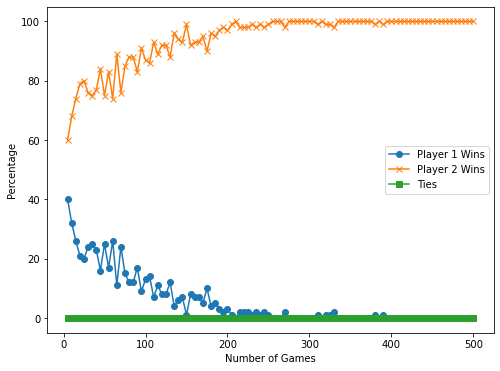

In [21]:
figure(figsize=(8,6))
plot(total_number_of_games,percentage_player1_wins,'-o',label="Player 1 Wins")
plot(total_number_of_games,percentage_player2_wins,'-x',label="Player 2 Wins")
plot(total_number_of_games,percentage_ties,'-s',label="Ties")
xlabel('Number of Games')
ylabel('Percentage')
legend()